## 在逻辑回归中添加多项式特征

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(666)
X = np.random.normal(0,1,size = (200, 2))
y = np.array((X[:,0]**2 + X[:,1]**2 < 1.5) ,dtype = 'int')

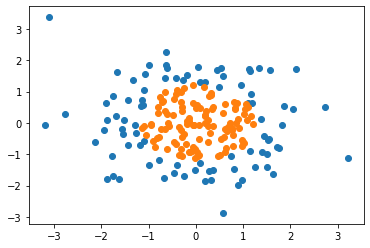

In [4]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

### 使用逻辑回归

In [5]:
import sys
sys.path.append('../')

In [6]:
from playMachine.LogisticRegression import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

../playMachine/LogisticRegression.py:21: RuntimeWarning: invalid value encountered in log
  y_hat = self._sigmoid(X_b*np.log(theta))
../playMachine/LogisticRegression.py:21: RuntimeWarning: divide by zero encountered in log
  y_hat = self._sigmoid(X_b*np.log(theta))
../playMachine/LogisticRegression.py:23: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y*np.log(y_hat)+(1-y)*log(1-y_hat))/len(y)


LogisticRegression()

In [7]:
log_reg.score(X,y)

0.605

In [8]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, alpha=0.75, cmap=custom_cmap)

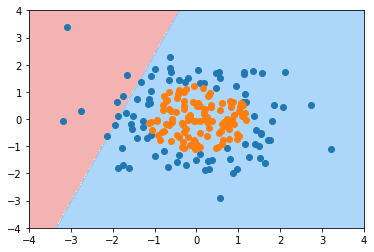

In [9]:
plot_decision_boundary(log_reg,[-4, 4, -4, 4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialLogisticRegression(degree):
    return Pipeline([
        ('poly',PolynomialFeatures(degree=degree)),
        ('std_scaler', StandardScaler()),
        ('log_reg', LogisticRegression())
    ])

In [11]:
poly_log_reg = PolynomialLogisticRegression(degree=2)
poly_log_reg.fit(X, y)

../playMachine/LogisticRegression.py:21: RuntimeWarning: divide by zero encountered in log
  y_hat = self._sigmoid(X_b*np.log(theta))
../playMachine/LogisticRegression.py:21: RuntimeWarning: invalid value encountered in log
  y_hat = self._sigmoid(X_b*np.log(theta))
../playMachine/LogisticRegression.py:21: RuntimeWarning: invalid value encountered in multiply
  y_hat = self._sigmoid(X_b*np.log(theta))
../playMachine/LogisticRegression.py:23: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y*np.log(y_hat)+(1-y)*log(1-y_hat))/len(y)


Pipeline(memory=None,
         steps=[('poly',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('std_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('log_reg', LogisticRegression())],
         verbose=False)

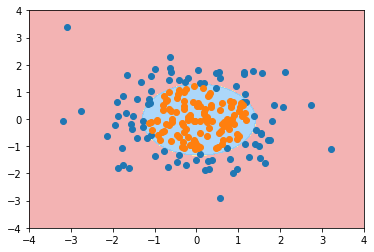

In [12]:
plot_decision_boundary(poly_log_reg,[-4, 4, -4, 4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [13]:
poly_log_reg.score(X, y)

0.95

../playMachine/LogisticRegression.py:21: RuntimeWarning: divide by zero encountered in log
  y_hat = self._sigmoid(X_b*np.log(theta))
../playMachine/LogisticRegression.py:21: RuntimeWarning: invalid value encountered in log
  y_hat = self._sigmoid(X_b*np.log(theta))
../playMachine/LogisticRegression.py:21: RuntimeWarning: invalid value encountered in multiply
  y_hat = self._sigmoid(X_b*np.log(theta))
../playMachine/LogisticRegression.py:23: RuntimeWarning: divide by zero encountered in log
  return -np.sum(y*np.log(y_hat)+(1-y)*log(1-y_hat))/len(y)


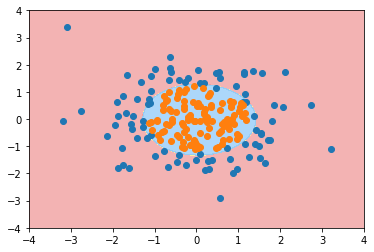

In [15]:
poly_log_reg = PolynomialLogisticRegression(degree=3)
poly_log_reg.fit(X, y)


plot_decision_boundary(poly_log_reg,[-4, 4, -4, 4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])